In [362]:
set_matplotlib_formats('svg')

## 坐标变换和注释

为图表添加各种注释元素: 文字, 箭头, 标注;  

**区域填充**

ax.fill_between(x,y1,y2,where=None): 填充两个水平曲线之间的面积(函数间区域填充);  
* x: 所绘曲线的所有x坐标, 长度为N;  
* y1, y2: 即使是一个标量, 也应当被认为是一个长度为N的数组;  
* `where`: 
    * None, 对数组x中的所有元素进行填充; 
    * 如果where是一个布尔数组, 只填充True所对应的部分

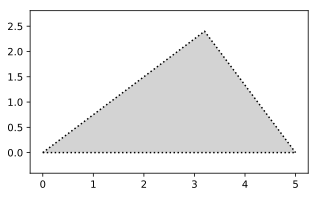

In [363]:
# 绘制一个直角三角形(3,4,5)并填充其面积:
plt.figure(figsize=(5,3))
theta = np.arcsin(3/5)
x  = [0, 4 * np.cos(theta), 5]
y1 = [0, 4 * np.sin(theta), 0]
y2 = [0,0,0]

plt.plot(x,y1,'k:')
plt.plot(x,y2,'k:')
plt.fill_between(x, y1, y2, facecolor="lightgray")

plt.xlim(0,5)
plt.ylim(0,3)
plt.axis('equal');

plt.fill(): 绘制填充多边形

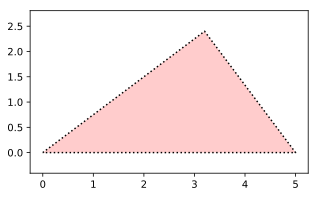

In [364]:
%clf
plt.figure(figsize=(5,3))
theta = np.arcsin(3/5)
x = [0, 4 * np.cos(theta), 5, 0]
y = [0, 4 * np.sin(theta), 0, 0]
plt.fill(x,y,'r',alpha=0.2)
plt.plot(x,y,'k:')
plt.xlim(0,5)
plt.ylim(0,3)
plt.axis('equal');

**综合示例**

计算两条曲线的交点

In [365]:
def func1(x): 
    return 0.6*x + 0.3
def func2(x): 
    return 0.4*x*x + 0.1*x + 0.2
def find_curve_intersects(x, y1, y2):
    """计算两条曲线的交点"""
    d = y1 - y2 #
    idx = np.where(d[:-1]*d[1:]<=0)[0] # 第一个变号点
    x1, x2 = x[idx], x[idx+1] 
    d1, d2 = d[idx], d[idx+1]
    return -d1*(x2-x1)/(d2-d1) + x1

x = np.linspace(-3,3,100) 
f1 = func1(x)
f2 = func2(x)
x1, x2 = find_curve_intersects(x, f1, f2) 

函数间区域填充

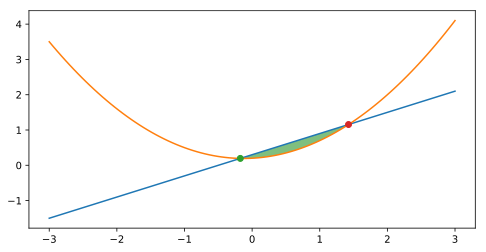

In [366]:
%clf
fig, ax = plt.subplots(figsize=(8,4))
# 两条曲线
ax.plot(x, f1)
ax.plot(x, f2)
# 交点
ax.plot(x1, func1(x1), "o") 
ax.plot(x2, func1(x2), "o")

# x轴上两个交点之间, y轴上两个曲线之间的面积
ax.fill_between(x, f1, f2, where=f1 > f2, facecolor="green", alpha=0.5) 

创建混合坐标变换对象: X轴使用数据坐标系, Y轴使用子图坐标系

In [367]:
from matplotlib import transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1) 

在图表中添加说明文字

In [368]:
a = ax.text(0.05, 0.95, "直线和二次曲线的交点", 
            transform = ax.transAxes,
            verticalalignment = "top",
            fontdict = {'fontname': 'simhei', 'fontsize': 16},
            bbox={"facecolor":"red","alpha":0.4,"pad":8}
            )

带箭头的注释

In [369]:
arrow = {"arrowstyle": "fancy,tail_width=0.6", 
         "facecolor": "gray", 
         "connectionstyle": "arc3,rad=-0.3"}
# 指向第一个交点的箭头
ax.annotate("交点", 
    xy=(x1, func1(x1)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    fontname= 'simhei', fontsize= 12,
    arrowprops = arrow)
# 指向第二个交点的箭头
ax.annotate(" "*4, 
    xy=(x2, func1(x2)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    fontname= 'simhei', fontsize= 12,
    arrowprops = arrow)
# 相交区域
xm = (x1+x2)/2
ym = (func1(xm) - func2(xm))/2+func2(xm)
o = ax.annotate("直线大于曲线区域", 
    xy =(xm, ym), xycoords="data",
    xytext = (30, -30), textcoords="offset points",    
    # bbox={"boxstyle":"round", "facecolor":(1.0, 0.7, 0.7), "edgecolor":"none"},
    fontname= 'simhei', fontsize= 12,
    arrowprops={"arrowstyle":"->"})

效果

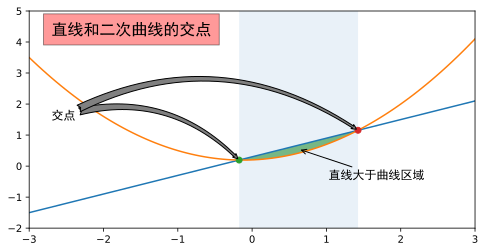

In [370]:
ax.set_xlim(-3,3);
ax.set_ylim(-2,5);
fig

### 四种坐标系

matplotlib有**四种坐标系**:

1. 数据坐标系: ,描述数据空间位置的坐标系, X(-3,3), Y(-2,5)
2. 子图坐标系: 描述子图位置的坐标系, 子图的左下标为(0,0), 右上标为(1,1)
3. 图表坐标系: 描述子图之间的相对位置, 子图与画布之间的空白等, 左下为00, 右上为11;
4. 窗口坐标系(像素坐标系): 
    * 绘图窗口中以像素为单位的坐标系, 左下标为00, 右上标为(width,height);
    * 窗口是不包含标题栏, 工具条以及状态栏的部分;
    * 将窗口坐标系理解为以像素为单位的图表坐标系?

**三种坐标变换对象**: 描述坐标系, 以及坐标系转换的对象

1. fig.transFigure: 图表坐标变换对象, 将图表坐标系转化为窗口坐标系;
1. ax.transAxes: 子图坐标变换对象, 实现子图坐标到图表坐标的转换;
1. ax.transData: 数据坐标变换对象;
    * ax.transLimits: 将数据坐标系的显示范围变换为单位矩形;
    * ax.tranScale: 绘制不同比例的坐标轴, 线性轴还是log轴;
    * ax.transAxes: 实现数据坐标到子图坐标的转换;

**示例: 坐标系变换**

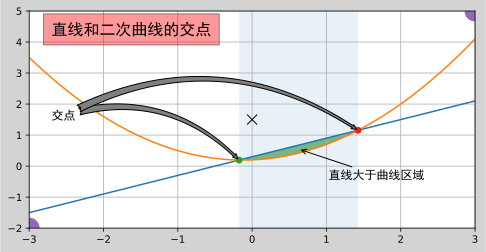

In [371]:
ax.plot([-3,3],[-2,5],'o', ms=20)
ax.plot(0,1.5,'kx', ms=10)  # 数据坐标系的中心
ax.grid(True)
fig.patch.set_color('lightgray')
fig

In [372]:
#将数据坐标(-3,-2)和(3,5)转化为窗口坐标
ax.transData.transform([(-3, -2),
                        ( 3, 5)])

array([[ 72.  ,  36.  ],
       [518.4 , 253.44]])

In [373]:
# 将子图坐标(0,0),(1,1)转化为窗口坐标;  
ax.transAxes.transform([(0, 0),
                        (1, 1)])

array([[ 72.  ,  36.  ],
       [518.4 , 253.44]])

In [374]:
# 将图表坐标(0,0),(1,1)转化为窗口坐标;  
# figsize(8,4)的单位是英寸, 该处一英寸表示71个像素点;
fig.transFigure.transform([(0, 0),
                           (1, 1)])

array([[  0.,   0.],
       [576., 288.]])

将窗口坐标中心(576/2,288/2)表示为数据坐标:  
窗口坐标系的中心并不是数据区域的中心, 这是因为子图的的左右余白不同导致的;

In [375]:
inv = ax.transData.inverted()
inv.transform((576/2,288/2))

array([-0.09677419,  1.47682119])

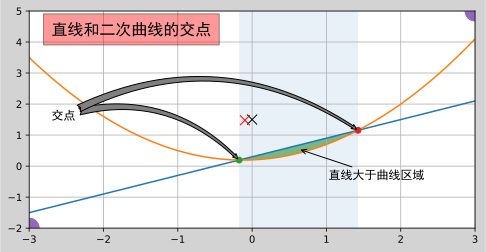

In [376]:
ax.plot(-0.09677419,  1.47682119, 'rx', ms=10) #窗口坐标系的中心
fig

修改子图X轴范围后, 三个坐标系如何变化:   
* figure的大小不会改变, 所以图表坐标和窗口坐标不会变化, 将它们作为整个图表的参考系;
* 子图坐标系和数据坐标系(数据坐标系又覆盖在子图坐标系之上)相当于其上覆盖的一层伸缩性极好的布条;  
* 子图的轴发生变化, 是在子图坐标系内的变化, 所以子图坐标系不需要相对参考系变化;  
* 而数据坐标会在子图坐标内变化, 类似于将布条进行伸缩, 以使其重新覆盖子图坐标系;  

 1: [607.68 253.44],    


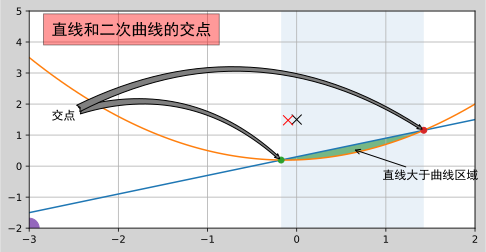

In [377]:
ax.set_xlim(-3, 2)
%P ax.transData.transform((3, 5)) # 原[720., 352.], 将[-3,2]之间的数据拉伸到适合窗口大小
fig

**图元坐标系**: 在绘制图元时, 必须给图元设置一个合适的坐标系  
* 左右两边经过两个交点 -> X轴必须使用数据坐标系;
* 高度充满整个子图的高度 -> Y轴必须使用子图坐标系; 
* 创建一个混合类型的坐标变换对象: `matplotlib.transforms.blended_transform_factory(x_transform,y_transform)`
* `axvspan()`和`axhspan()`可以快速绘制垂直方向和水平方向上的区间, 其默认坐标系应该是在子图坐标系;  

坐标变换对象的`transform()`方法, 可以将当前坐标系下的坐标(前3类)转化为窗口坐标系中的坐标(像素);  

In [378]:
# 将相对坐标系都转化到窗口坐标系
lst = [(0,0), (.5,.5), (1,1), (-2,3)] 
data2window = ax.transData.transform(lst)      # 数据坐标系->窗口坐标系
axes2window = ax.transAxes.transform(lst)      # 子图坐标系->窗口坐标系
figure2window = fig.transFigure.transform(lst) # 图表坐标系->窗口坐标系
%C 5 lst; data2window; axes2window; figure2window

     lst             data2window             axes2window            figure2window   
-------------     ------------------     --------------------     ------------------
[[ 0.   0. ]      [[339.84,  98.13],     [[  72.  ,   36.  ],     [[    0.,     0.],
 [ 0.5  0.5]       [384.48, 113.66],      [ 295.2 ,  144.72],      [  288.,   144.],
 [ 1.   1. ]       [429.12, 129.19],      [ 518.4 ,  253.44],      [  576.,   288.],
 [-2.   3. ]]      [161.28, 191.31]]      [-820.8 ,  688.32]]      [-1152.,   864.]]


坐标变换对象的`inverted()`方法, 创建反变换对象, 可以实现窗口坐标系到到三种相对坐标系的变换;

In [379]:
# 将窗口坐标系转化到各种相对坐标系
window2data = ax.transData.inverted().transform(data2window)
window2axes= ax.transAxes.inverted().transform(axes2window)
window2fig= fig.transFigure.inverted().transform(figure2window)
%C 5 window2data; window2axes; window2fig

 window2data        window2axes         window2fig  
--------------     --------------     --------------
[[ 0. ,  0. ],     [[ 0. , -0. ],     [[ 0. ,  0. ],
 [ 0.5,  0.5],      [ 0.5,  0.5],      [ 0.5,  0.5],
 [ 1. ,  1. ],      [ 1. ,  1. ],      [ 1. ,  1. ],
 [-2. ,  3. ]]      [-2. ,  3. ]]      [-2. ,  3. ]]


### 坐标变换的流水线

本节问题:
1. 坐标变换是如何进行的;
2. 笛卡尔坐标与对数坐标的区别;

#### 图表坐标变换对象的内部结构:    

* **Bbox**: 以英寸为单位的图表对象(矩形区域), figsize(8,4);  
* **Affine2D**: 变换矩阵, (fig.dpi, 像素数/英寸), 可以将以英寸为单位的矩形区域, 变换为以像素为单位的矩形区域, 也就是图表坐标->窗口坐标;  
* **TransformedBbox**: 其`_points`, 以像素为单位的矩形区域, 相当于窗口的像素范围;
* **BboxTransformTo**: 其`_mtx`属性是一个变换矩阵, 将图表坐标系中的点(相对点)转化为窗口坐标系中的对应点(以像素描述的绝对点);

!data/transFigure.dot>


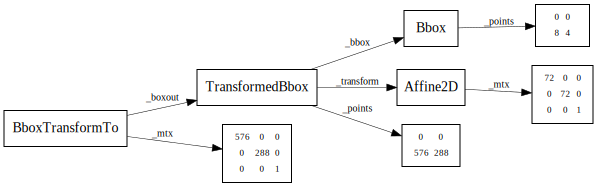

In [380]:
from common import GraphvizMPLTransform
GraphvizMPLTransform.graphviz(fig.transFigure, 'data/transFigure.dot')
dot2graph('data/transFigure.dot')

In [381]:
points = fig.transFigure._boxout._bbox._points
mtx = fig.transFigure._boxout._transform._mtx
mtx = mtx[:2] #变换矩阵最后一行永远是[0,0,1], 可以写成shape(2,3)
points2 = np.dot(points, mtx)
%C 5 points; mtx; points2

  points              mtx                  points2       
----------     -----------------     --------------------
[[0., 0.],     [[72.,  0.,  0.],     [[  0.,   0.,   0.],
 [8., 4.]]      [ 0., 72.,  0.]]      [576., 288.,   0.]]


In [382]:
# 以英寸为单位的图表大小
%C fig.transFigure._boxout._bbox._points; fig.get_size_inches()

fig.transFigure._boxout._bbox._points  fig.get_size_inches()
-------------------------------------  ---------------------
[[0., 0.],                             [8., 4.]             
 [8., 4.]]                                                  


In [383]:
# 变换矩阵: 以英寸为单位的图表对象->以像素为单位的图表对象:   
%C 5 fig.transFigure._boxout._transform; fig.dpi_scale_trans; fig.get_dpi()

fig.transFigure._boxout._transform     fig.dpi_scale_trans     fig.get_dpi()
----------------------------------     -------------------     -------------
[[72.  0.  0.]                         [[72.  0.  0.]          72.0         
 [ 0. 72.  0.]                          [ 0. 72.  0.]                       
 [ 0.  0.  1.]]                         [ 0.  0.  1.]]                      


#### 子图坐标变换对象的内部结构

!data/transAxes.dot>


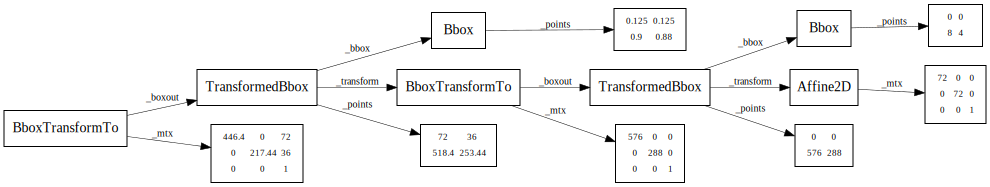

In [384]:
GraphvizMPLTransform.graphviz(ax.transAxes, 'data/transAxes.dot')
dot2graph('data/transAxes.dot')

* ax.transAxes是一个BboxTransformTo对象, 并且在其内部又包含了一个BboxTransformTo对象(实现图表坐标向窗口坐标的变换);  
* `ax.transAxes._boxout._bbox._points`: 表示子图在图表坐标系中的位置;  
* mtx`[[155,0,25],[0,77,11],[0,0,1]]`, 表示变换矩阵, 将子图坐标变换为窗口坐标;

In [385]:
points = np.array(ax.get_position()) # ax.transAxes._boxout._bbox._points
mtx = ax.transAxes._boxout._transform._mtx
mtx = mtx[:2,]
points2 = points.dot(mtx)
%C 5 points; mtx; points2

    points                 mtx                       points2          
--------------     --------------------     --------------------------
[[0.12, 0.12],     [[576.,   0.,   0.],     [[ 72.  ,  36.  ,   0.  ],
 [0.9 , 0.88]]      [  0., 288.,   0.]]      [518.4 , 253.44,   0.  ]]


#### 数据坐标变换对象的内部结构

**ax.transData**内部结构: 
* ax.**transScale**
* ax.**transLimits**
* ax.transAxes

ax.transLimits的内部结构:  
* **BboxTransformFrom**: 将一个`数据坐标范围`, 变换为(0,0)-(1,1)相对矩形区域;
* **TransformWrapper**: 此处是一个恒等变换, 也可能是描述对数变换之类的矩阵;

!data/transLimits.dot>


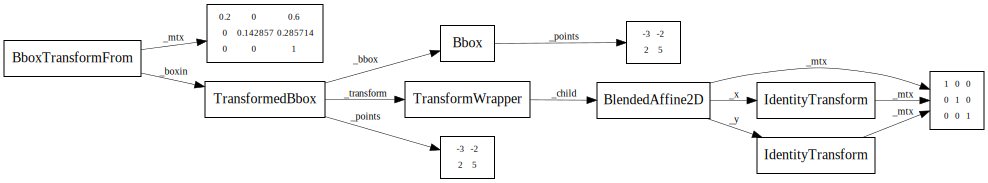

In [386]:
GraphvizMPLTransform.graphviz(ax.transLimits, 'data/transLimits.dot')
dot2graph('data/transLimits.dot')

In [387]:
%P ax.transLimits.transform((-3,-2)); ax.transLimits.transform((2, 5))

 1: [0. 0.],     2: [1. 1.],    


极限变换的内部结构是?

In [388]:
points = ax.transLimits._boxin._points
points = np.r_['1,2,0',points, [1,1]] #使用三维向量表示平面上的点: (x,y,1)表示(x,y)
mtx = ax.transLimits._mtx
%C 5 mtx; points.T;  np.dot(mtx,points.T).T

        mtx                points.T       np.dot(mtx,points.T).T
--------------------     ------------     ----------------------
[[0.2 , 0.  , 0.6 ],     [[-3.,  2.],     [[0., 0., 1.],        
 [0.  , 0.14, 0.29],      [-2.,  5.],      [1., 1., 1.]]        
 [0.  , 0.  , 1.  ]]      [ 1.,  1.]]                           


In [389]:
%P ax.get_xlim(); ax.get_ylim()

 1: (-3.0, 2.0),     2: (-2.0, 5.0),    


使用`+`将两个变换连接起来可以创建一个新的变换对象: `ax.transLimits+ax.transAxes`;  
* transLimits: 将数据坐标系的显示范围变换为单位矩形;  
* transAxes: 将单位矩形变换为窗口矩形;  
* 在本例中, `ax.transData =  ax.transLimits + ax.transAxes`;  

In [390]:
t = ax.transLimits + ax.transAxes
%C 5 t.transform((0,0)); ax.transData.transform((0,0))

t.transform((0,0))     ax.transData.transform((0,0))
------------------     -----------------------------
[339.84,  98.13]       [339.84,  98.13]             


为了支持不同的坐标轴, transData还包括一个**TransScale变换**;  
`ax.transData = ax.transLimits + ax.transAxes + ax.transScale`;

In [391]:
ax.transScale

TransformWrapper(
    BlendedAffine2D(
        IdentityTransform(),
        IdentityTransform()))

当使用semilogx(), semilogy(), 以及loglog()绘制对数轴;  
或者使用ax.set_xscale()和ax.set_yscale()将坐标轴设置为对数坐标时, transScale就不再是恒等变换了;

!transScale.dot>


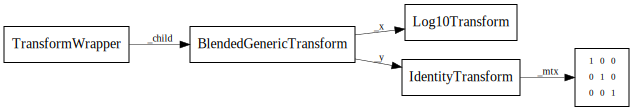

In [392]:
# 将x轴重新定义为对数轴
# X轴对应一个, Log10Transform
ax.set_xscale('log')
GraphvizMPLTransform.graphviz(ax.transScale,'transScale.dot')
dot2graph('transScale.dot')

In [393]:
# 将x轴重新定义为线性轴, X轴范围仍然是(-3,3)
ax.set_xscale('linear')
ax.set_xlim(-3, 3)

(-3, 3)

### 制作阴影效果

使用坐标变换绘制带阴影的曲线: 循环绘制N条透明度和偏移量逐渐变化的曲线;  

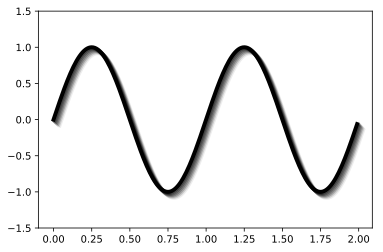

In [394]:
%clf
fig2, ax = plt.subplots()
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)

N = 7 # 阴影的条数

for i in range(N, 0, -1):
    offset = transforms.ScaledTranslation(i, -i, transforms.IdentityTransform())
    shadow_trans = plt.gca().transData + offset
    ax.plot(x,y,linewidth=4,color="black", transform=shadow_trans, alpha=(N-i)/2.0/N)
    
ax.plot(x,y,linewidth=4,color='black')    
ax.set_ylim((-1.5, 1.5));

1. 单纯的偏移变换(offset):
    * transforms.ScaledTranslation: 三个参数分别为, X轴的偏移量, Y轴的偏移量, 坐标变换对象(经过他变换之后在进行偏移变换);
    * IdentityTransform(): 全等变换;  
2. 先进行数据变换(变为窗口坐标), 再进行偏移变换: 数据坐标变换对象+偏移变换对象;

i=1时的偏移变换(最终表现为偏移一个像素)

In [395]:
offset.transform((0,0)) # 将(0,0)变换为(1,-1)

array([ 1., -1.])

数据变换与偏移变换的流水线

In [396]:
# 对(0,0)进行数据坐标变换
%C 5 ax.transData.transform((0,0));  shadow_trans.transform((0,0))  # 对(0,0)进行数据坐标变换和偏移变换

ax.transData.transform((0,0))     shadow_trans.transform((0,0))  # 对(0,0)进行数据坐标变换和偏移变换
-----------------------------     ----------------------------------------------------
[ 69.22, 144.72]                  [ 70.22, 143.72]                                    


### 添加注释

无指向型注释:  
* text(): 默认在数据坐标系中添加文字;  
* figtext(): 默认在图表坐标系中添加文字;
* transform关键字可以改变文字所处的坐标系;

如何在不同的坐标系中添加注释

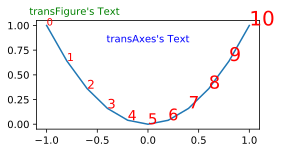

In [397]:
x = np.linspace(-1,1,11)
y = x**2

fig3, ax = plt.subplots(figsize=(4,2))
ax.plot(x,y)

# 在数据坐标系中添加文字
for i, (_x, _y) in enumerate(zip(x, y)):  # zip可以实现坐标分量到坐标的转化
    ax.text(_x, _y, str(i), color="red", fontsize=i+10) # 为每个数据点添加标注
# 在子图坐标系中添加文字
ax.text(0.5, 0.8, "transAxes's Text", color="blue", ha="center", transform=ax.transAxes) 
# 在图表坐标系中添加文字
plt.figtext(0.1, 0.92, "transFigure's Text", color="green");
plt.show()

#### 指向型注释:  

annotate(s,xy,xytext=None,xycoords='data', textcoords='data', arrowprops=None,...): 文本为起点, 箭角为终点;
* s: 注释文本, 箭头向量起点处的文本;  
* xy: 箭头向量的终点坐标;  
* xytext: 注释文本所在的坐标, 箭头向量的起点坐标;  
* xycoords: 指定终点坐标的坐标变换方式;  
* textcoords: 指定起点坐标的坐标变换方式;  
* arrowtype: 描述箭头样式的字典

属性值和相应的坐标变换方式

|属性值|描述|
--:|--:|
|figure points|     以点为单位相对于图表左下角的坐标 |
|figure pixels|     以像素为单位, 相对于图表左下角的坐标 |
|figure fraction|   图表坐标系中的坐标 |
|axes points|       以点为单位, 相对于子图左下角的坐标 |
|axes pixels|       以像素为单位, 相对于子图左下角的坐标 |
|axes fraction|     子图坐标系中的坐标 |
|data|              数据坐标系中的坐标(default) |
|polar|             数据坐标系中的极坐标  |

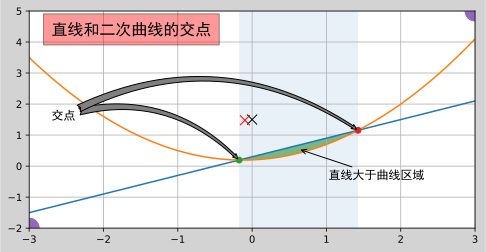

In [398]:
fig

In [ ]:
'offset points'     offset (in points) from the *xy* value
'offset pixels'     offset (in pixels) from the *xy* value

    If a `~matplotlib.artist.Artist` object is passed in the units are
    fraction if it's bounding box.

    If a `~matplotlib.transforms.Transform` object is passed
    in use that to transform ``xy`` to screen coordinates

    If a callable it must take a
    `~matplotlib.backend_bases.RendererBase` object as input
    and return a `~matplotlib.transforms.Transform` or
    `~matplotlib.transforms.Bbox` object

    If a `tuple` must be length 2 tuple of str, `Artist`,
    `Transform` or callable objects.  The first transform is
    used for the *x* coordinate and the second for *y*.

    See :ref:`plotting-guide-annotation` for more details.

    Defaults to ``'data'``

textcoords : str, `Artist`, `Transform`, callable or tuple, optional
    The coordinate system that ``xytext`` is given, which
    may be different than the coordinate system used for
    ``xy``.

    All ``xycoords`` values are valid as well as the following
    strings:


arrowprops : dict, optional

    If not None, properties used to draw a
    `~matplotlib.patches.FancyArrowPatch` arrow between ``xy`` and
    ``xytext``.

    If `arrowprops` does not contain the key ``'arrowstyle'`` the
    allowed keys are:

    ==========   ======================================================
    Key          Description
    ==========   ======================================================
    width        the width of the arrow in points
    headwidth    the width of the base of the arrow head in points
    headlength   the length of the arrow head in points
    shrink       fraction of total length to 'shrink' from both ends
    ?            any key to :class:`matplotlib.patches.FancyArrowPatch`
    ==========   ======================================================

    If the `arrowprops` contains the key ``'arrowstyle'`` the
    above keys are forbidden.  The allowed values of
    ``'arrowstyle'`` are:

    ============   =============================================
    Name           Attrs
    ============   =============================================
    ``'-'``        None
    ``'->'``       head_length=0.4,head_width=0.2
    ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
    ``'|-|'``      widthA=1.0,widthB=1.0
    ``'-|>'``      head_length=0.4,head_width=0.2
    ``'<-'``       head_length=0.4,head_width=0.2
    ``'<->'``      head_length=0.4,head_width=0.2
    ``'<|-'``      head_length=0.4,head_width=0.2
    ``'<|-|>'``    head_length=0.4,head_width=0.2
    ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
    ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
    ``'wedge'``    tail_width=0.3,shrink_factor=0.5
    ============   =============================================

    Valid keys for `~matplotlib.patches.FancyArrowPatch` are:

    ===============  ==================================================
    Key              Description
    ===============  ==================================================
    arrowstyle       the arrow style
    connectionstyle  the connection style
    relpos           default is (0.5, 0.5)
    patchA           default is bounding box of the text
    patchB           default is None
    shrinkA          default is 2 points
    shrinkB          default is 2 points
    mutation_scale   default is text size (in points)
    mutation_aspect  default is 1.
    ?                any key for :class:`matplotlib.patches.PathPatch`
    ===============  ==================================================

In [299]:
kk 2

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$!kk2:end>$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
